In [1]:
#Import required packages
import ee
import pandas as pd
import numpy as np
import geopandas as gpd
import geemap
import json
import requests
from shapely.geometry import Point
from functools import reduce
import geemap.foliumap as foliumap
from matplotlib import pyplot as plt

In [2]:
# User-defined Variables
my_cloud_project = 'ee-YourCloudProject' # your GEE cloud project ID
background_asset = 'conus_background' # name of your GEE background asset 

# Each NAS has a unique species ID that tells the database which taxa you want records from.
#Get species ID from https://nas.er.usgs.gov/api/v2/species 
#use ctrl f to search for your NAS. Change my_species_id to match
# zebra mussels = 5 ; emf = 237; ebt = 939
my_species_id = 5 

# Set Up geometry, background and import yearly covariate rasters.
MY_state_abbrev = 'MN' # change to your state of interest
MY_state = 'Minnesota' # change to your state of interest
MY_scale = 100

In [3]:
ee.Authenticate() # You should already be authenticated from making your covariate rasters, but run just in case
# Leave the read-only box un-checked
# To force re-authentication run ee.Authenticate(force = True) instead 
ee.Initialize(project=my_cloud_project) # your GEE cloud project

In [4]:
# Get state geometry
conus_states = ee.FeatureCollection('TIGER/2018/States')
MY_geo = conus_states.filter(ee.Filter.equals('STUSPS', MY_state_abbrev)).geometry() 

# You should have uploaded the background shapefile by now.
background = ee.FeatureCollection("projects/" + my_cloud_project +"/assets/" + background_asset) # Change to the path where you stored the background csv
MY_background = background.filter(ee.Filter.eq('states', MY_state_abbrev))

## Import the yearly covariate rasters you made here. These are examples for MN. Change paths here to your gee assets.  
Image_1 = ee.Image("projects/" + my_cloud_project +"/assets/covariates_" + MY_state_abbrev + "_2003") 
Image_2 = ee.Image("projects/" + my_cloud_project +"/assets/covariates_" + MY_state_abbrev + "_2004")
Image_3 = ee.Image("projects/" + my_cloud_project +"/assets/covariates_" + MY_state_abbrev + "_2005") 
Image_4 = ee.Image("projects/" + my_cloud_project +"/assets/covariates_" + MY_state_abbrev + "_2006")
Image_5 = ee.Image("projects/" + my_cloud_project +"/assets/covariates_" + MY_state_abbrev + "_2007") 
Image_6 = ee.Image("projects/" + my_cloud_project +"/assets/covariates_" + MY_state_abbrev + "_2008")
Image_7 = ee.Image("projects/" + my_cloud_project +"/assets/covariates_" + MY_state_abbrev + "_2009") 
Image_8 = ee.Image("projects/" + my_cloud_project +"/assets/covariates_" + MY_state_abbrev + "_2010")
Image_9 = ee.Image("projects/" + my_cloud_project +"/assets/covariates_" + MY_state_abbrev + "_2011") 
Image_10 = ee.Image("projects/" + my_cloud_project +"/assets/covariates_" + MY_state_abbrev + "_2012")
Image_11 = ee.Image("projects/" + my_cloud_project +"/assets/covariates_" + MY_state_abbrev + "_2013") 
Image_12 = ee.Image("projects/" + my_cloud_project +"/assets/covariates_" + MY_state_abbrev + "_2014")
Image_13 = ee.Image("projects/" + my_cloud_project +"/assets/covariates_" + MY_state_abbrev + "_2015") 
Image_14 = ee.Image("projects/" + my_cloud_project +"/assets/covariates_" + MY_state_abbrev + "_2016")
Image_15 = ee.Image("projects/" + my_cloud_project +"/assets/covariates_" + MY_state_abbrev + "_2017") 
Image_16 = ee.Image("projects/" + my_cloud_project +"/assets/covariates_" + MY_state_abbrev + "_2018")
Image_17 = ee.Image("projects/" + my_cloud_project +"/assets/covariates_" + MY_state_abbrev + "_2019") 
Image_18 = ee.Image("projects/" + my_cloud_project +"/assets/covariates_" + MY_state_abbrev + "_2020")
Image_19 = ee.Image("projects/" + my_cloud_project +"/assets/covariates_" + MY_state_abbrev + "_2021") 


## If you want a different timeframe, remove images from within parentheses before creating ImageCollection.
my_env_data = ee.ImageCollection([Image_1, Image_2, Image_3, Image_4, Image_5, Image_6, Image_7, Image_8, Image_9, Image_10,
                                Image_11, Image_12, Image_13, Image_14, Image_15, Image_16, Image_17, Image_18, Image_19]).median()

In [ ]:
## If you want to reduce the extent being modeled
## Import your shapefile and convert it to a geometry asset
# my_local_shape = ee.FeatureCollection('projects/ee-GEE-Cloud-ID/assets/My_Shapefile_Asset').geometry()
## Then use the geometry to clip you environmental data
# my_local_env = my_env_mean.clip(my_local_shape)
## Now change my_env_mean to my_local_env below.
## You will also need to filter the occurence and background data sets... See commented out script below

In [5]:
##Hint: Highlight multiple lines and use ctrl / to uncomment all highlighted lines

# ## If you want to predict to another state or increase the area modeled (after making rasters for an additional state) uncomment this block of code.
# MY_state_abbrev_2 = 'ID'
# MY_state_2 = 'Idaho'
# ## You can comment out years to change the timeframe you model
# Image_21 = ee.Image("projects/" + my_cloud_project +"/assets/covariates_" + MY_state_abbrev_2 + "_2003") 
# Image_22 = ee.Image("projects/" + my_cloud_project +"/assets/covariates_" + MY_state_abbrev_2 + "_2004")
# Image_23 = ee.Image("projects/" + my_cloud_project +"/assets/covariates_" + MY_state_abbrev_2 + "_2005") 
# Image_24 = ee.Image("projects/" + my_cloud_project +"/assets/covariates_" + MY_state_abbrev_2 + "_2006")
# Image_25 = ee.Image("projects/" + my_cloud_project +"/assets/covariates_" + MY_state_abbrev_2 + "_2007") 
# Image_26 = ee.Image("projects/" + my_cloud_project +"/assets/covariates_" + MY_state_abbrev_2 + "_2008")
# Image_27 = ee.Image("projects/" + my_cloud_project +"/assets/covariates_" + MY_state_abbrev_2 + "_2009") 
# Image_28 = ee.Image("projects/" + my_cloud_project +"/assets/covariates_" + MY_state_abbrev_2 + "_2010")
# Image_29 = ee.Image("projects/" + my_cloud_project +"/assets/covariates_" + MY_state_abbrev_2 + "_2011") 
# Image_30 = ee.Image("projects/" + my_cloud_project +"/assets/covariates_" + MY_state_abbrev_2 + "_2012")
# Image_31 = ee.Image("projects/" + my_cloud_project +"/assets/covariates_" + MY_state_abbrev_2 + "_2013") 
# Image_32 = ee.Image("projects/" + my_cloud_project +"/assets/covariates_" + MY_state_abbrev_2 + "_2014")
# Image_33 = ee.Image("projects/" + my_cloud_project +"/assets/covariates_" + MY_state_abbrev_2 + "_2015") 
# Image_34 = ee.Image("projects/" + my_cloud_project +"/assets/covariates_" + MY_state_abbrev_2 + "_2016")
# Image_35 = ee.Image("projects/" + my_cloud_project +"/assets/covariates_" + MY_state_abbrev_2 + "_2017") 
# Image_36 = ee.Image("projects/" + my_cloud_project +"/assets/covariates_" + MY_state_abbrev_2 + "_2018")
# Image_37 = ee.Image("projects/" + my_cloud_project +"/assets/covariates_" + MY_state_abbrev_2 + "_2019") 
# Image_38 = ee.Image("projects/" + my_cloud_project +"/assets/covariates_" + MY_state_abbrev_2 + "_2020")
# Image_39 = ee.Image("projects/" + my_cloud_project +"/assets/covariates_" + MY_state_abbrev_2 + "_2021") 

# ## If you commented out years above, you need to remove them from the list of images here.
# my_env_data_2 = ee.ImageCollection([Image_21, Image_22, Image_23, Image_24, Image_25, Image_26, Image_27, Image_28, Image_29, Image_30,
#                                Image_31, Image_32, Image_33, Image_34, Image_35, Image_36, Image_37, Image_38, Image_39, 
#                                 ]).median()

In [6]:
## Currently, all environmental parameters from your covariate rasters will be used to build the model
## You can comment out parameters you don't want used to train your model by inserting # in front of the band name in this list.
parameter_selector = [
    'elevation', # for example, you might comment out elevation when using a model trained with MN data to project to ID.
    'Heat_Insolation_Load',
    'Topographic_Diversity',
    'gHM',
    'Max_LST_Annual',
    'Mean_GPP',
    'Max_NDVI',
    'Max_EVI', 
    'winter_totalPrecip', 
    'spring_totalPrecip',
    'summer_totalPrecip', 
    'fall_totalPrecip', 
    'Flashiness']
MY_collections = my_env_data.select(parameter_selector)
# MY_collections_2 = my_env_data_2.select(parameter_selector)

In [7]:
#Helper functions for importing/formatting data from NAS API
def _get_col_rename(df, dftype):
    """Returns a dictionary of columns to rename based on the dataframe and type('csv' or 'api')"""
# Build a dictionary of column renamings for use in pandas rename function
    renamed_columns = {}
    column_names = list(df.columns)
    lower_columns = [name.lower().replace(' ','').replace('_','') for name in column_names]
    for i in range(len(column_names)):
        renamed_columns[column_names[i]] = lower_columns[i]

    if dftype == 'csv':
        # build csv rename dictionary
        renamed_columns['museumcatno'] = 'museumcatnumber'
        renamed_columns['huc8number']  = 'huc8'
    elif dftype == 'api':
        # build api rename dictionary
        renamed_columns['key']              = 'specimennumber'
        renamed_columns['decimallatitude']  = 'latitude'
        renamed_columns['decimallongitude'] = 'longitude'
        renamed_columns['latlongsource']    = 'source'
        renamed_columns['latlongaccuracy']  = 'accuracy'
    else:
        raise ValueError(f"Dataframe type '{dftype}' invalid - Accepted inputs are 'csv' or 'api'")

    return renamed_columns

def _manage_cols(df, drop_list=[], name_dict={}):
    """Private method for dropping and renaming columns in a dataframe, as well as creating one standard table from two different forms."""

    for colname in drop_list:
        if colname not in df:
            raise ValueError(f"Can't drop column '{colname}' - '{colname}' does not exist in dataframe")
    for colname in list(name_dict.keys()):
        if colname not in df:
            raise ValueError(f"Can't rename '{colname}' to '{name_dict[colname]}' - '{colname}' does not exist in dataframe")
        if colname in drop_list:
            raise ValueError(f"Can't rename '{colname}' to '{name_dict[colname]}' - '{colname}' in drop_list")

    column_names = np.setdiff1d(list(df.columns), list(name_dict.keys()))
    lower_columns = [name.lower().replace(' ','').replace('_','') for name in column_names]
    for i in range(len(column_names)):
        name_dict[column_names[i]] = lower_columns[i]
    
    df = df.drop(drop_list, axis=1)
    df = df.rename(columns=name_dict)
    
    return df

URL_BASE = 'http://nas.er.usgs.gov/api/v2/'

def api_df(species_id, limit, api_key):
    """Returns a pandas dataframe containing records about a species from the NAS database using their API"""
    
    # Check for API key
    if api_key is not None:
        url_request = f"{URL_BASE}/occurrence/search?species_ID={species_id}&api_key={api_key}"
    else:
        url_request = f"{URL_BASE}/occurrence/search?species_ID={species_id}"
    
    # Get dataframe from API request
    request_json = requests.get(url_request, params={'limit':limit}).json()
    api_df = pd.json_normalize(request_json, 'results')
    api_df = _manage_cols(api_df)

    # Add columns that are in a CSV dataframe but not an API dataframe
    api_df['country']      = np.nan
    api_df['drainagename'] = np.nan

    # Rename columns
    renamed_columns = _get_col_rename(api_df, 'api')
    api_df = api_df.rename(columns=renamed_columns)

    # Reorder columns
    cols = list(api_df.columns)
    cols = cols[0:8] + cols[33:34] + cols[8:33] + cols[34:] # country
    cols = cols[0:16] + cols[34:] + cols[16:34] # drainagename
    api_df = api_df[cols]
    
    return api_df

In [8]:
#Get records by species ID from NAS database.
my_NAS = api_df(my_species_id, limit = 10000, api_key = {"speciesID": my_species_id})
## Grab just the columns we need for filtering the occurence records
my_data = my_NAS[["state", "latitude", "longitude", "year", "status", "accuracy"]]
## Filter the pandas dataframe to get only accurate presences for your state.
## If you are increasing the extent of your model, you can get NAS data for multiple states by replacing
# & (my_data['state'] == My_state) with & (my_data['state'].isin([MY_state, 'State_2_name'])
my_data = my_NAS[["state", "latitude", "longitude", "year", "status", "accuracy"]]
my_data_fltr = my_data[(my_data['status'] == 'established') & (my_data['accuracy'] == 'Accurate')
& (my_data['state'] == MY_state)] 
my_data_fixed = my_data_fltr.dropna()
#turn it into a geo datafrome
user_data_gdf = gpd.GeoDataFrame(
    my_data_fixed, geometry=gpd.points_from_xy(my_data_fixed.longitude, my_data_fixed.latitude))
#add Coordinate Reference System (CRS)
user_data_gdf.crs = "EPSG:4326"
#convert geopandas object into ee object
fc = geemap.geopandas_to_ee(user_data_gdf)
#add present property 
def addPresent (property):
    return property.set('Present', 1);
user_data = fc.map(addPresent)

In [ ]:
# To add your own data (using a CSV w/ latitude and Longitude columns)
# Import CSV
# my_presence_data = pd.read_csv('C:/YourFilename.csv')
# user_gdf = gpd.GeoDataFrame(
    #my_presence_data, geometry=gpd.points_from_xy(my_presence_data.longitude, my_presence_data.latitude))
# user_gdf.crs = "EPSG:4326"
# my_gdf = geemap.geopandas_to_ee(user_gdf)
# my_presence_data = my_gdf.map(addPresent)
# Replace user_data with your info in the next block of code or use .merge() to cobine your data with NAS database records.

## If you are increasing your extent, you will need background points from multiple states. This is not necessary for predicting to another state.
# My_background = background.filter(ee.Filter.eq('states', [MY_state_abbrev, 'MY_state_abbrev_2'])

## If you only want a specific year or timeframe, you need to filter the data you pulled from the NAS database
# user_data_year = user_data.filter(ee.Filter.eq("year", 2003)
## replace user_data in the next block with user_data_year

In [65]:
## Train and test your model
## Run 10-fold cross validation to check model performance
results_df = []
importance_df = []
for x in range(10):
    data_split = user_data.randomColumn(seed= x)
    training_data = data_split.filter(ee.Filter.lte('random', 0.75)).merge(MY_background)
    testing_data = data_split.filter(ee.Filter.gt('random', 0.75))
            
# split for training and testing with eDNA
    training_points = MY_collections.reduceRegions(**{
                              'collection': training_data,
                              'reducer': ee.Reducer.mean(),
                              'crs': 'EPSG:4326',
                              'scale': MY_scale,
                              'tileScale': 16})
#Define Classifier and setup for MaxEnt Parameters 
    classifier = ee.Classifier.amnhMaxent().train(**{
        'features': training_points,
        'classProperty': 'Present',
        'inputProperties': MY_collections.bandNames()
    })
    
    MY_input_classified = MY_collections.classify(classifier);
    
    testing_points = MY_input_classified.reduceRegions(**{
                              'collection': testing_data,
                              'reducer': ee.Reducer.mean(),
                              'crs': 'EPSG:4326',
                              'scale': MY_scale,
                              'tileScale': 16})
    

#Select get the predictions from the testing locations
    false_neg_testing = testing_points.select('probability');
    my_false_negs =  false_neg_testing.filter(ee.Filter.lessThan('probability', 0.30)).size();
    my_true_pos = false_neg_testing.filter(ee.Filter.greaterThan('probability', 0.70)).size();
    my_fn_rate =  my_false_negs.divide(my_false_negs.add(my_true_pos));
    results = ee.List([my_fn_rate]).getInfo()
    classifier_results = classifier.explain();
    importance = classifier_results.get('Contributions')
    imp = importance.getInfo()
    results_df.append(results)
    importance_df.append(imp)

Text(0.5, 1.0, 'Cross Validation Results')

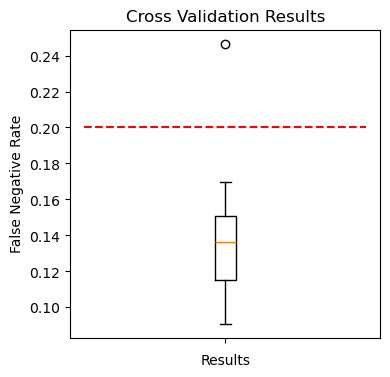

In [66]:
## Plot results of cross validation
all_data = pd.DataFrame(results_df)
fig, ax1 = plt.subplots(figsize=(4, 4))
labels = ['All Data']
# rectangular box plot
bplot1 = ax1.boxplot(all_data, vert=True) 
plt.hlines(0.2, xmin=0, xmax=2, color='r', linestyles='--')
ax1.set_ylabel('False Negative Rate')
ax1.set_xticklabels("")
ax1.set_xlabel('Results')
ax1.set_title('Cross Validation Results')

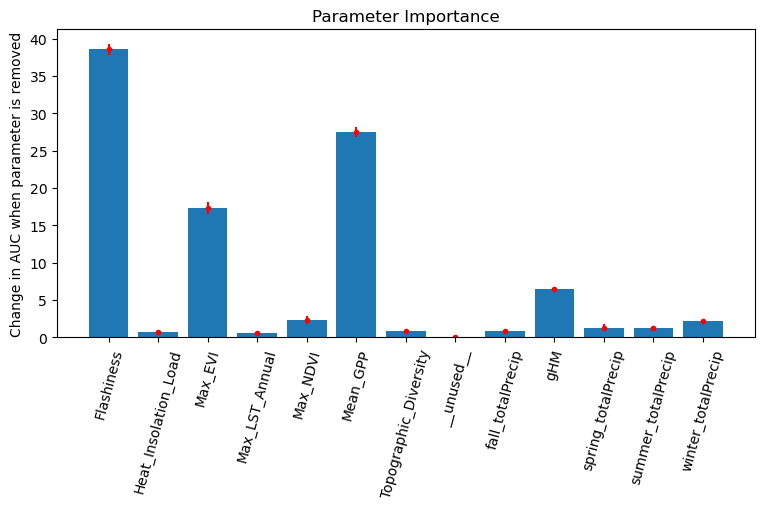

In [99]:
#Check parameter contributions/importance
imp_df = pd.DataFrame(importance_df)
imp_df_mean = pd.DataFrame(imp_df.mean(axis=0))
imp_df_se = pd.DataFrame(imp_df.sem(axis=0))
imp_results = imp_df_mean.merge(imp_df_se, left_index=True, right_index=True).reset_index()
imp_formatted = imp_results.rename(columns={"index": "Parameter", "0_x": "Contribution", "0_y": "std_er"})
fig, ax = plt.subplots(figsize=(9, 4))
params = np.array(imp_formatted['Parameter'])
importance = np.array(imp_formatted['Contribution'])
err_bars = np.array(imp_formatted['std_er'])
ax.bar(params, importance)
plt.errorbar(params, importance, yerr=err_bars, fmt=".", color="r")
plt.xticks(rotation = 75)
ax.set_ylabel('Change in AUC when parameter is removed')
ax.set_title('Parameter Importance')
plt.show()

In [100]:
# Re-train the model without withholding the 25% for testing, and classify image to get heatmap produced with all data
map_data = user_data.merge(MY_background)

training_points_2 = MY_collections.reduceRegions(**{
                              'collection': map_data,
                              'reducer': ee.Reducer.mean(),
                              'crs': 'EPSG:4326',
                              'scale': MY_scale,
                              'tileScale': 16})
classifier_2 = ee.Classifier.amnhMaxent().train(**{
    'features': training_points_2,
    'classProperty': 'Present',
    'inputProperties': MY_collections.bandNames()
})

#Use the new model to classify the environmental data
MY_input_classified = MY_collections.classify(classifier_2);
# MY_input_classified_2 = MY_collections_2.classify(classifier_2);

# Use the Surface Water Occurence Band to mask the prediction so only pixels with water are visible
water_pixels = my_env_data.select('SurfaceWaterOccurrence')
waterMask = water_pixels.gte(0.2)
prediction_masked = MY_input_classified.mask(waterMask)

# water_pixels_2 = my_env_data_2.select('SurfaceWaterOccurrence')
# waterMask_2 = water_pixels_2.gte(0.2)
# prediction_masked_2 = MY_input_classified_2.mask(waterMask_2)

# Apply smoothing function
smoother = ee.Kernel.square(**{
    'radius': 8,
    'magnitude': 1
})
smoothed = prediction_masked.convolve(smoother)
# smoothed_2 = prediction_masked_2.convolve(smoother)

#Create color paramaters and map classified image
Probability_PARAMS = {"opacity":1,"bands":["probability"],
"palette":["2b83ba","6ab0af","abdda4","cdebaf","ffffbf", "fed790", "fdae61", "d7191c","d7191c"]}
Map = foliumap.Map(center=[45,-95], zoom=6)
Map.add_colorbar(Probability_PARAMS)
Map.addLayer(smoothed, Probability_PARAMS, 'Habitat Suitability')
# Map.addLayer(smoothed_2, Probability_PARAMS, 'Habitat Suitability')
Map

In [ ]:
#Export your heatmap to your GEE assets
task = ee.batch.Export.image.toAsset(
    image = prediction_masked,
    description='my_heatmap',
    assetId="projects/" + my_cloud_project +"/assets/my_heatmap",  # <> modify these
    region=MY_geo,
    scale=100)
task.start()